In [213]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

In [214]:
data = pd.read_csv('data/Train.csv', low_memory=False)
pd.set_option('display.max_columns', None)

for i in data.columns:
    if data[i].isnull().sum() == 0:
        data.drop


In [283]:
data

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,log_price
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,521D,521,D,NaN,NaN,NaN,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,11.097410
1,1139248,57000,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,950FII,950,F,II,NaN,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,23.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,10.950807
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,226,226,NaN,NaN,NaN,NaN,Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,OROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.210340
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,PC120-6E,PC120,NaN,-6E,NaN,Small,"Hydraulic Excavator, Track - 12.0 to 14.0 Metr...",Texas,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.558414
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,S175,S175,NaN,NaN,NaN,NaN,Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,EROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.305651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401120,6333336,10500,1840702,21439,149,1.0,2005,NaN,NaN,11/2/2011 0:00,35NX2,35,NX,2,NaN,Mini,"Hydraulic Excavator, Track - 3.0 to 4.0 Metric...",Maryland,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,9.259131
401121,6333337,11000,1830472,21439,149,1.0,2005,NaN,NaN,11/2/2011 0:00,35NX2,35,NX,2,NaN,Mini,"Hydraulic Excavator, Track - 3.0 to 4.0 Metric...",Maryland,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,9.305651
401122,6333338,11500,1887659,21439,149,1.0,2005,NaN,NaN,11/2/2011 0:00,35NX2,35,NX,2,NaN,Mini,"Hydraulic Excavator, Track - 3.0 to 4.0 Metric...",Maryland,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,

In [215]:
data['log_price'] = np.log(data['SalePrice'])
data['ProductSize'].unique()

array([nan, 'Medium', 'Small', 'Large / Medium', 'Mini', 'Large',
       'Compact'], dtype=object)

In [216]:
#got the year made past 1970
data_1970 = data[data['YearMade'] > 1970]
#grabbed only the log price and the product size
productdf = data_1970[['ProductSize', 'log_price']].dropna()
#used get dummmies to separate product size
dummy = pd.get_dummies(productdf['ProductSize']).drop(columns='Mini')
X = sm.add_constant(dummy)
y = productdf['log_price']

In [217]:
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                 1.569e+04
Date:                Fri, 17 Jan 2020   Prob (F-statistic):               0.00
Time:                        14:34:47   Log-Likelihood:            -1.3362e+05
No. Observations:              165604   AIC:                         2.673e+05
Df Residuals:                  165598   BIC:                         2.673e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              9.5827      0.004   2504.561      0.000       9.575       9.590
Compact            0.1135      0.008     13.868      0.000       0.097       0.129
Large              0.9782      0.006    171.911      0.000       0.967       0.989
Large / Medium     1.0875      0.005    236.360      0.000       1.078       1.097
Medium             1.0552      0.004    236.080      0.000       1.046       1.064
Small              0.7238      0.005    138.555      0.000       0.714       0.734
==============================================================================
Omnibus:                     3984.698   Durbin-Watson:                   0.818
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4238.803
Skew:                          -0.386   Prob(JB):                         0.00
Kurtosis:                       2.863   Cond. No.                         8.65
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [218]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [219]:
# fills different nans inside product size to see which was best to fill.
for i in data['ProductSize'].unique():
    productdf2 = data_1970[['ProductSize', 'log_price']].fillna(i)
    dummy2 = pd.get_dummies(productdf2['ProductSize']).drop(columns='Mini')
    X2 = sm.add_constant(dummy2)
    y2 = productdf2['log_price']
    model2 = sm.OLS(y2, X2)
    results2 = model2.fit()
    print('Fill na values with {}'.format(i))
    print('-------------------------')
    print('R2: {}'.format(results2.rsquared))
    print('\n')

Fill na values with nan
-------------------------
R2: 0.2643542832636072


Fill na values with Medium
-------------------------
R2: 0.14435153903841125


Fill na values with Small
-------------------------
R2: 0.25738105716135184


Fill na values with Large / Medium
-------------------------
R2: 0.15350715238767565


Fill na values with Mini
-------------------------
R2: 0.2643542832636072


Fill na values with Large
-------------------------
R2: 0.23856053440247604


Fill na values with Compact
-------------------------
R2: 0.2746250592556717




In [220]:
X_c

,const,Compact,Large,Large / Medium,Medium,Small
0,1.0,1,0,0,0,0
1,1.0,0,0,0,1,0
2,1.0,1,0,0,0,0
3,1.0,0,0,0,0,1
4,1.0,1,0,0,0,0
...,...,...,...,...,...,...
401120,1.0,0,0,0,0,0
401121,1.0,0,0,0,0,0
401122,1.0,0,0,0,0,0
401123,1.0,0,0,0,0,0


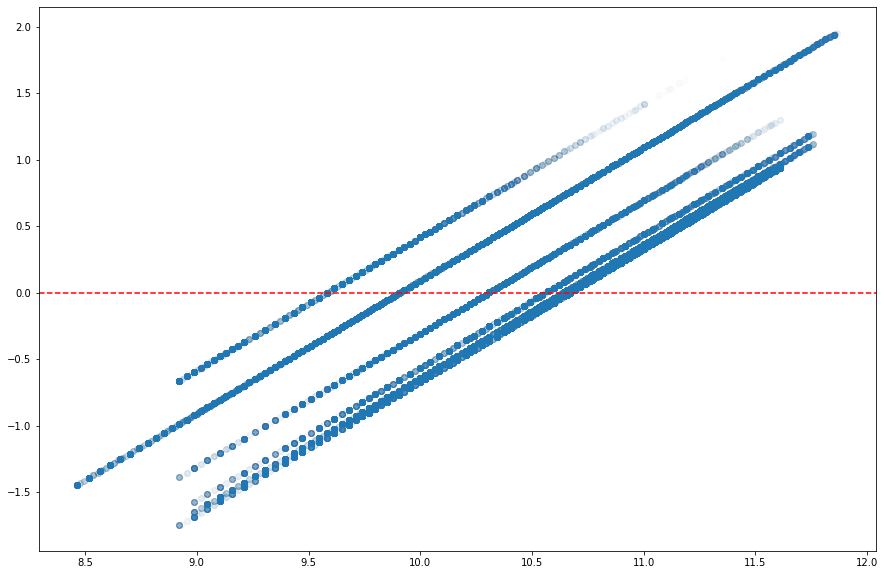

In [221]:
productdf_compact = data_1970[['ProductSize', 'log_price']].fillna('Compact')
dummy_compact = pd.get_dummies(productdf_compact['ProductSize']).drop(columns='Mini')
X_c = sm.add_constant(dummy_compact)
y_c = productdf_compact['log_price']
model_c = sm.OLS(y_c, X_c)
results_c = model_c.fit()
results_c.resid
#print('Fill na values with {}'.format(i))
#print('-------------------------')
#print('R2: {}'.format(results2.rsquared))
#print('\n')
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(productdf_compact['log_price'], results_c.resid, alpha=0.01)
plt.axhline(0, linestyle='--',color='r')
#from matplotlib.pyplot import figure
#figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')

In [233]:
data_1970[['ProductSize', 'log_price']].fillna('Compact').groupby('ProductSize').mean().round(3)

,log_price
ProductSize,
Compact,9.908
Large,10.561
Large / Medium,10.670
Medium,10.638
Mini,9.583
Small,10.306


In [293]:
new = data_1970[['ProductSize', 'log_price']].fillna('Compact').replace({'Mini':0, 'Compact':1, 'Small': 2, 'Medium':3, 'Large':5, 'Large / Medium':4})

Text(0, 0.5, 'Residuals')

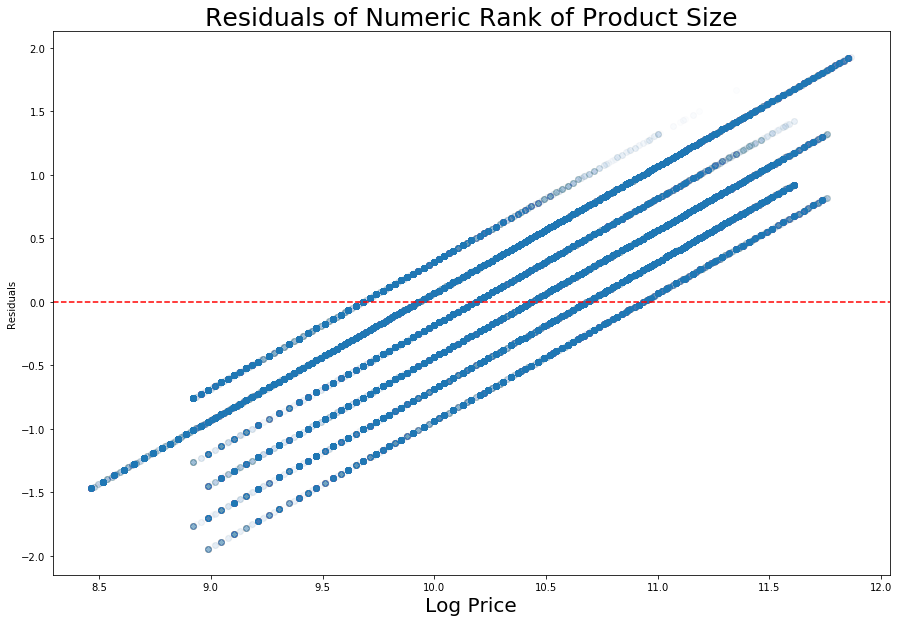

In [294]:
X_new = sm.add_constant(new['ProductSize'])
y_new = new['log_price']
model_new = sm.OLS(y_new, X_new)
results_new = model_new.fit()
results_new.summary()
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(y_new, results_new.resid, alpha=0.01)
plt.axhline(0, linestyle='--',color='r')
plt.title('Residuals of Numeric Rank of Product Size', size=25)
plt.xlabel('Log Price', size=20)
plt.ylabel('Residuals')

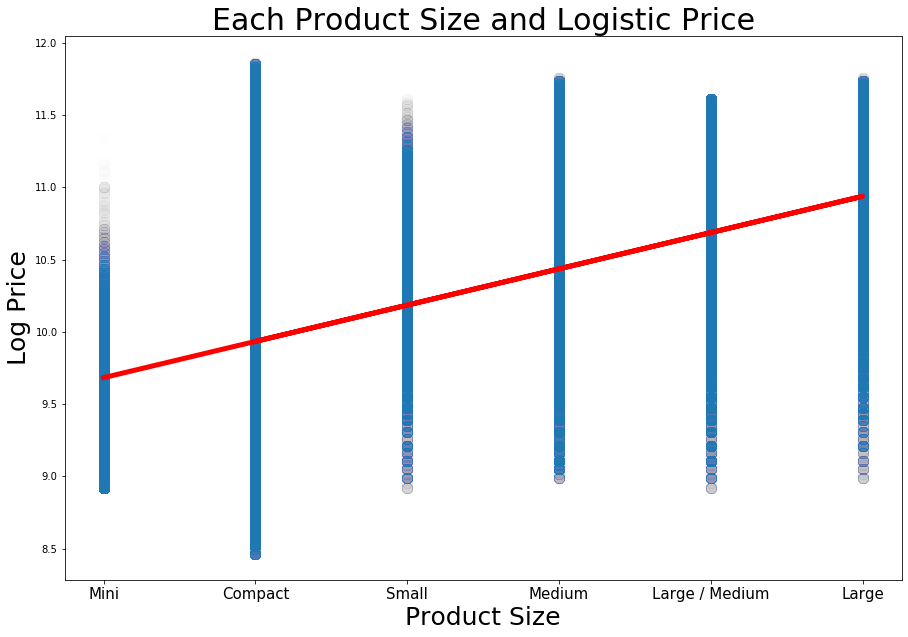

In [304]:
const, size = results_new.params
fig, ax = plt.subplots(figsize=(15,10))
plt.scatter(new['ProductSize'], new['log_price'], alpha=0.002, s=120)
plt.plot(new['ProductSize'], new['ProductSize'].map(lambda x: const + size * x), color='r', linewidth=5)
plt.title('Each Product Size and Logistic Price', size=30, pad=1)
plt.xlabel('Product Size', size=25)
plt.xticks(np.arange(6),('Mini', 'Compact', 'Small', 'Medium','Large / Medium',  'Large'), size=15)
plt.ylabel('Log Price', size=25);
plt.save_fig()

In [129]:
#X = sm.add_constant(pd.get_dummies(prod_df['ProductSize'])).drop(columns='Small')
#y = prod_df['log_SalePrice']


In [12]:
#benchmark = pd.read_csv('data/median_benchmark.csv')